# Importing Libraries

In [ ]:
!pip --quiet install yfinance
!pip --quiet install arch
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
# from arch import arch_model
sns.set()
%matplotlib inline

import pandas_datareader.data as web
from datetime import datetime, timedelta
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
     |████████████████████████████████| 899 kB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 42.0 MB/s 


# Downloading data from Yahoo Finance

In [ ]:
start = dt.datetime(2021, 10, 1)
end = dt.datetime.now()

df = yf.download("WE", start=start, end=end)
df_spy = yf.download("SPY", start=start, end=end)
df=df[['Adj Close']]
df_spy=df_spy[['Adj Close']]
df = df.rename({'Adj Close': 'VIX_Close'}, axis=1)
df_spy = df_spy.rename({'Adj Close': 'SPY_Close'}, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,VIX_Close
Date,
2021-10-21,11.78
2021-10-22,13.02
2021-10-25,13.18
2021-10-26,12.35
2021-10-27,10.36
2021-10-28,10.57
2021-10-29,10.21
2021-11-01,9.99


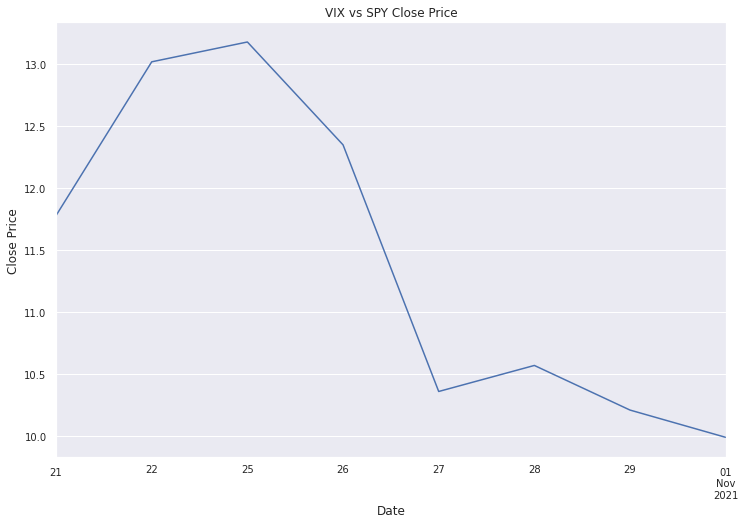

In [ ]:
df["VIX_Close"].plot(figsize=(12,8),title="VIX vs SPY Close Price",fontsize=10)
plt.ylabel('Close Price', fontsize=12)
# df_spy["SPY_Close"].plot(figsize=(12,8),fontsize=10,secondary_y=True)

plt.xlabel('Date', fontsize=12)
# df["MA 20"][20:].plot(figsize=(10,5),color="Red")
plt.show()

# Calculating historical volatilities 6-month, 3-month, 1-month, or 2-week)

In [ ]:
df["Log_VIX_Close"]=np.log(df["VIX_Close"]).diff()

window_1 = 180  # days in rolling window
window_2 = 90
window_3 = 30
window_4 = 14

dpy = 252  # trading days per year

ann_factor_1 = dpy / window_1
ann_factor_2= dpy / window_2
ann_factor_3= dpy / window_3
ann_factor_4= dpy / window_4

df['real_vol_180'] = np.sqrt(df["Log_VIX_Close"].rolling(window_1).var() * ann_factor_1)
df['real_vol_90'] = np.sqrt(df["Log_VIX_Close"].rolling(window_2).var() * ann_factor_2)
df['real_vol_30'] = np.sqrt(df["Log_VIX_Close"].rolling(window_3).var() * ann_factor_3)
df['real_vol_14'] = np.sqrt(df["Log_VIX_Close"].rolling(window_4).var() * ann_factor_4)
  
# df.tail(30)


Text(0.5, 1.0, 'Historical Volatilities')

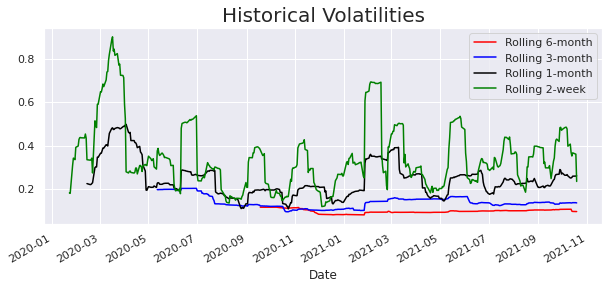

In [ ]:
plt.figure(figsize=(10,4))
df['real_vol_180'].plot(color='red')
df['real_vol_90'].plot(color='blue')
df['real_vol_30'].plot(color='black')
df['real_vol_14'].plot(color='green')
plt.legend(['Rolling 6-month', 'Rolling 3-month', 'Rolling 1-month','Rolling 2-week'])

plt.title('Historical Volatilities', fontsize=20)

In [ ]:
# returns = 100 * df.VIX_Close.pct_change()
returns = 100*(df.VIX_Close.shift(1) / df.VIX_Close - 1).dropna()


In [ ]:
# returns=np.array(returns)

Text(0.5, 1.0, 'VIX Returns')

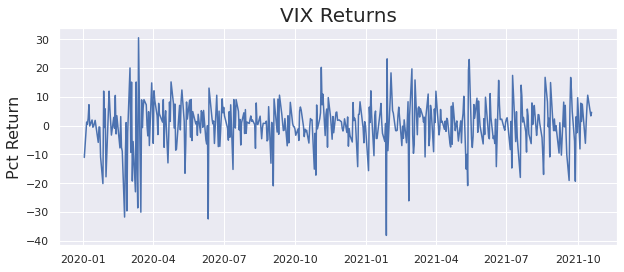

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

# Determine orders of the GARCH model using partial Autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


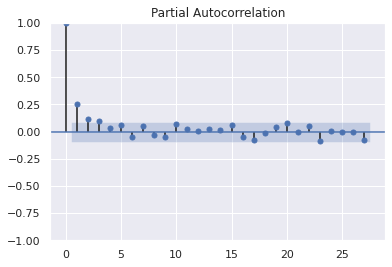

In [ ]:
plot_pacf(returns**2)
plt.show()

In [ ]:
model = arch_model(returns, mean='Zero', vol='EGARCH',p=2, q=0) #then change q to 0

# Fitting the model

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2371.855975209791
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2130.1437442171336
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2112.3580805565125
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1609.618202613485
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1598.8104191970394
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1589.6269404910877
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1587.9818819381283
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1585.1593133501292
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1585.0248547013002
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1585.019158436643
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1585.0187150056329
Iteration:     12,   Func. Count:     69,   Neg. LLF: 1585.0172417034216
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1585.014774549058
Iteration:     14,   Func. Count:     79,   Neg. LLF: 1

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - EARCH Model Results                        
==============================================================================
Dep. Variable:              VIX_Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      EARCH   Log-Likelihood:               -1585.01
Distribution:                  Normal   AIC:                           3176.02
Method:            Maximum Likelihood   BIC:                           3188.37
                                        No. Observations:                  452
Date:                Tue, Oct 19 2021   Df Residuals:                      452
Time:                        20:12:38   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.2194      0.130     32.422 1.349e-230   [  3.964,  4.474]
alpha[1]       0.3103      0.125      2.483  1.304e-02 [6.534e-02,  0.555]
alpha[2]       0.3583  9.280e-02      3.861  1.131e-04   [  0.176,  0.540]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
predictions=[]
simulations=[]
test_size = 252

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, vol='GARCH', p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    predictions.append(pred.mean.values[-1,:][0])
    simulations.append(pred.simulations)
    # predictions.append(np.sqrt(pred.values[-1,:][0]))
    rolling_predictions.append(pred.variance.values[-1][0]**0.5) 


In [ ]:
# rolling_predictions

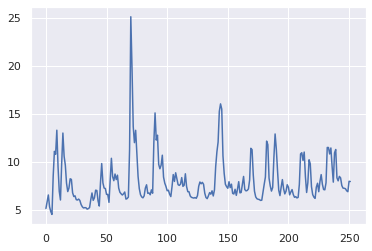

In [ ]:
# plt.plot(rolling_predictions)

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-252:])
# rolling_predictions

# Predictions

In [ ]:
# plt.plot(np.array(returns[-365:]))
# plt.plot(np.array(rolling_predictions))

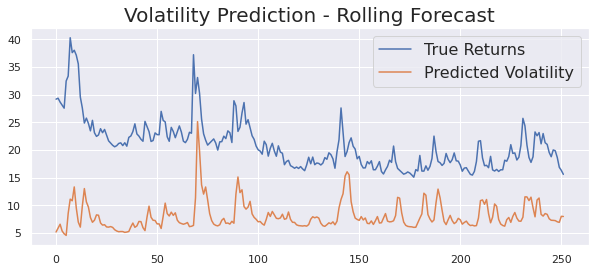

In [ ]:
plt.figure(figsize=(10,4))
# true, = plt.plot(np.array(returns[-252:]))
true, = plt.plot(np.array(df.VIX_Close[-252:]))
preds, = plt.plot(np.array((rolling_predictions)))
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(np.array(returns[-252:]))
# true, = plt.plot(np.array(df.VIX_Close[-252:]))
preds, = plt.plot(np.array((rolling_predictions)))
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [ ]:
daily_return = rolling_predictions.pct_change(1)

In [ ]:
daily_return

Date
2020-10-19         NaN
2020-10-20    0.137037
2020-10-21    0.119104
2020-10-22   -0.185721
2020-10-23   -0.093993
                ...   
2021-10-12   -0.005823
2021-10-13   -0.029705
2021-10-14   -0.014233
2021-10-18    0.156967
2021-10-19   -0.003104
Length: 252, dtype: float64

In [ ]:
train = returns
model = arch_model(train, p=2, q=0)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=30)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,31)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
# pred = pd.Series(pred.variance.values[-1,:]), index=future_dates)

In [ ]:
pred.variance.values[-1,:]

# Actual Predictions

In [ ]:
# plt.figure(figsize=(10,4))
# plt.plot(pred)
# plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [ ]:
pred

2021-10-19     9.700326
2021-10-20     8.285306
2021-10-21    10.023354
2021-10-22     9.612295
2021-10-23    10.218874
2021-10-24    10.098707
2021-10-25    10.323198
2021-10-26    10.290173
2021-10-27    10.375460
2021-10-28    10.367735
2021-10-29    10.400659
2021-10-30    10.399635
2021-10-31    10.412502
2021-11-01    10.412885
2021-11-02    10.417967
2021-11-03    10.418428
2021-11-04    10.420455
2021-11-05    10.420760
2021-11-06    10.421576
2021-11-07    10.421746
2021-11-08    10.422078
2021-11-09    10.422165
2021-11-10    10.422301
2021-11-11    10.422343
2021-11-12    10.422399
2021-11-13    10.422419
2021-11-14    10.422443
2021-11-15    10.422452
2021-11-16    10.422462
2021-11-17    10.422466
dtype: float64

## Regression Analysis (You can start here)

In [ ]:
!pip install --quiet pingouin
import pingouin as pg
!pip --quiet install yfinance
!pip --quiet install arch
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Viktor-BDML/ctf/main/df_monthly_regression.csv')
df.set_index('DATE', inplace=True)
df.tail()

,UNRATE,CPI,SPY,VIX,OIL
DATE,,,,,
3/31/21,6.1,112.579267,387.004112,21.843044,62.357391
4/30/21,5.8,113.304531,410.249699,17.416191,61.703810
5/31/21,5.9,114.329774,413.295973,19.760500,65.157000
6/30/21,5.4,114.871507,420.822737,16.956818,71.352729
7/31/21,5.2,115.186674,433.704837,17.603334,72.430477


In [ ]:
pg.linear_regression(df[['UNRATE','CPI','SPY','OIL']], df['VIX'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-82.429191,28.229398,-2.919977,4.108193e-03,0.652574,0.642203,-138.262021,-26.596360
1,UNRATE,2.847726,0.186610,15.260275,4.243105e-31,0.652574,0.642203,2.478643,3.216809
2,CPI,0.978156,0.313444,3.120673,2.210267e-03,0.652574,0.642203,0.358218,1.598093
3,SPY,-0.045553,0.020909,-2.178597,3.111074e-02,0.652574,0.642203,-0.086907,-0.004198
4,OIL,-0.113889,0.018961,-6.006348,1.682814e-08,0.652574,0.642203,-0.151392,-0.076387


## Incorporating COVID & Bitcoin

In [ ]:
df_covid=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths.csv')
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.set_index('date', inplace=True)
df_US=df_covid[['United States']]
df_US = df_US[df_US['United States'].notna()]
df_US = df_US.rename({'United States': 'US_Covid_Deaths'}, axis=1)
df_US.head(5)

,US_Covid_Deaths
date,
2020-02-29,1.0
2020-03-01,0.0
2020-03-02,5.0
2020-03-03,1.0
2020-03-04,4.0


In [ ]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()

df_VIX = yf.download("^VIX", start=start, end=end)
df_spy = yf.download("SPY", start=start, end=end)
df_VIX=df_VIX[['Adj Close']]
df_spy=df_spy[['Adj Close']]
df_VIX = df_VIX.rename({'Adj Close': 'VIX_Close'}, axis=1)
df_spy = df_spy.rename({'Adj Close': 'SPY_Close'}, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()

df_oil = yf.download("CL=F", start=start, end=end)
df_oil=df_oil[['Adj Close']]
df_oil = df_oil.rename({'Adj Close': 'OIL_Close'}, axis=1)
# df_oil
df_bitcoin = yf.download("BTC-USD", start=start, end=end)
df_bitcoin=df_bitcoin[['Adj Close']]
df_bitcoin = df_bitcoin.rename({'Adj Close': 'Bitcoin_Close'}, axis=1)
# df_bitcoin

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
spy=df_spy.SPY_Close
vix=df_VIX.VIX_Close
oil=df_oil.OIL_Close
US_covid=df_US.US_Covid_Deaths
bitcoin=df_bitcoin.Bitcoin_Close

df_frame = { 'SPY': spy, 'VIX': vix, 'OIL': oil,'US_covid':US_covid,'Bitcoin':bitcoin}
data = pd.DataFrame(df_frame)
data = data[data['OIL'].notna()]
data = data[data['US_covid'].notna()]
data = data[data['Bitcoin'].notna()]
data = data[data['VIX'].notna()]
data = data[data['SPY'].notna()]

In [ ]:
data

,SPY,VIX,OIL,US_covid,Bitcoin
2020-03-02,300.484222,33.419998,46.750000,5.0,8869.669922
2020-03-03,291.880615,36.820000,47.180000,1.0,8787.786133
2020-03-04,304.149261,31.990000,46.779999,4.0,8755.246094
2020-03-05,294.038818,39.619999,45.900002,1.0,9078.762695
2020-03-06,289.178009,41.939999,41.279999,2.0,9122.545898
...,...,...,...,...,...
2021-10-08,437.859985,18.770000,79.349998,1856.0,53967.847656
2021-10-11,434.690002,20.000000,80.519997,1192.0,57484.789062
2021-10-12,433.619995,19.850000,80.639999,2215.0,56041.058594
2021-10-13,435.179993,18.639999,80.440002,3087.0,57401.097656


In [ ]:
pg.linear_regression(data[['OIL','US_covid','Bitcoin','SPY']], data['VIX'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,96.377795,3.483906,27.663718,6.564815e-95,0.683542,0.680377,89.528741,103.226849
1,OIL,0.144678,0.054800,2.640128,8.611753e-03,0.683542,0.680377,0.036947,0.252409
2,US_covid,-0.000480,0.000320,-1.498860,1.346987e-01,0.683542,0.680377,-0.001110,0.000150
3,Bitcoin,0.000147,0.000032,4.543705,7.330167e-06,0.683542,0.680377,0.000083,0.000210
4,SPY,-0.224012,0.016108,-13.907281,3.824135e-36,0.683542,0.680377,-0.255678,-0.192346
